# EP-LHb-RNN

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from EPLHb import EPLHb, gd, adam

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
from matplotlib import rcParams

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# rcParams['figure.figsize'] = [20, 4]
# rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

## Define model and optimizers

In [7]:
#@title Downloading MNIST data

train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor())

#@title Loading the data
batch_size = 100 # the size of input data took for one iteration

train_loader = torch.utils.data.DataLoader(dataset = train_data,
                                             batch_size = batch_size,
                                             shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                      batch_size = batch_size,
                                      shuffle = False)

## Train RNN model

In [8]:
input_size = 784 # img_size = (28,28) ---> 28*28=784 in total
hidden_size = 100 # number of nodes at hidden layer
output_size = 10 # number of output classes discrete range [0,9]
num_epochs = 5 # 20 # number of times which the entire dataset is passed throughout the model
lr = 1e-3 # size of step

In [9]:
corelease_net = EPLHb(input_size,hidden_size,output_size,
                      fixed_sign=False,rnn=True,real_circuit=True)
if torch.cuda.is_available(): corelease_net.cuda()

# Initalize training details
loss_function = nn.CrossEntropyLoss()
# optimizer = gd(net.parameters(), lr=lr)
optimizer = adam(corelease_net.parameters(), lr=lr)
cr_training_loss = []
cr_test_accuracy = []

LHb_RNN.weight_ih_l0
 Positive: 49.80739653110504%; Negative: 50.19260048866272%; Zero: 0.0%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 56.00000023841858%; Negative: 43.99999976158142%; Zero: 0.0%
LHb_RNN.bias_hh_l0
 Positive: 46.99999988079071%; Negative: 52.99999713897705%; Zero: 0.0%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 100.0%; Zero: 0.0%
LHb_to_DAN.bias
 Positive: 69.9999988079071%; Negative: 30.000001192092896%; Zero: 0.0%


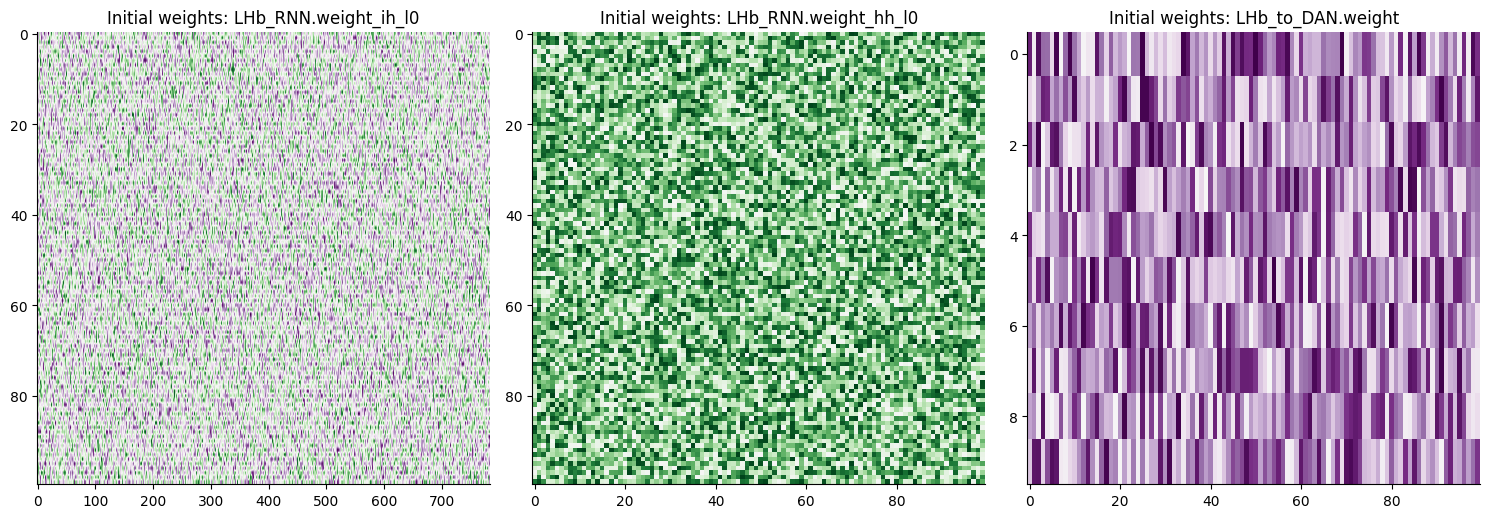

In [10]:
# Save the initial weights
initial_params_corelease = corelease_net.record_params()

# Plot initialized weights
fig, axs = plt.subplots(1,int(len(initial_params_corelease)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in initial_params_corelease.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Initial weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

Epoch [1/5], Iteration: 0, Loss: 2, Accuracy: 14.5500
Epoch [1/5], Iteration: 100, Loss: 1, Accuracy: 87.7600
Epoch [1/5], Iteration: 200, Loss: 1, Accuracy: 89.9400
Epoch [1/5], Iteration: 300, Loss: 1, Accuracy: 91.2700
Epoch [1/5], Iteration: 400, Loss: 0, Accuracy: 91.6600
Epoch [1/5], Iteration: 500, Loss: 1, Accuracy: 91.9300
Epoch [2/5], Iteration: 0, Loss: 0, Accuracy: 92.4200
Epoch [2/5], Iteration: 100, Loss: 0, Accuracy: 92.8600
Epoch [2/5], Iteration: 200, Loss: 0, Accuracy: 93.0300
Epoch [2/5], Iteration: 300, Loss: 0, Accuracy: 93.3600
Epoch [2/5], Iteration: 400, Loss: 0, Accuracy: 93.5600
Epoch [2/5], Iteration: 500, Loss: 0, Accuracy: 93.8500
Epoch [3/5], Iteration: 0, Loss: 0, Accuracy: 93.9900
Epoch [3/5], Iteration: 100, Loss: 0, Accuracy: 94.0900
Epoch [3/5], Iteration: 200, Loss: 0, Accuracy: 94.2700
Epoch [3/5], Iteration: 300, Loss: 0, Accuracy: 94.3900
Epoch [3/5], Iteration: 400, Loss: 0, Accuracy: 94.5400
Epoch [3/5], Iteration: 500, Loss: 0, Accuracy: 94.610

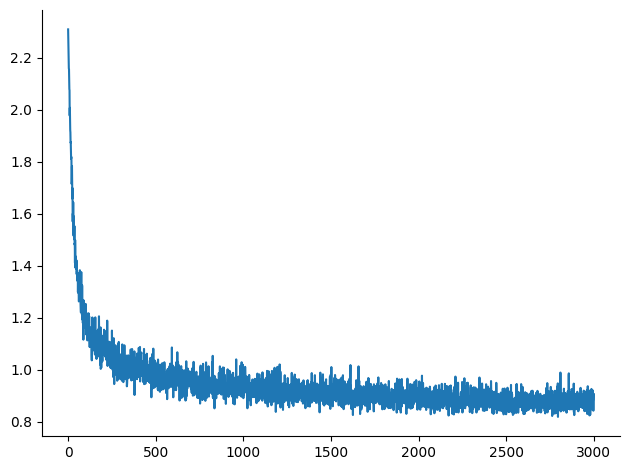

In [11]:
# Train the network
training_loss, test_accuracy = corelease_net.train_model(num_epochs,train_loader,optimizer,loss='CrossEntropyLoss',
                                          test_loader=test_loader,print_epoch=True)
cr_training_loss.extend(training_loss)
cr_test_accuracy.extend(test_accuracy)

# Plot training loss
plt.plot(cr_training_loss)

LHb_RNN.weight_ih_l0
 Positive: 56.12499713897705%; Negative: 43.87499988079071%; Zero: 0.0%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 72.00000286102295%; Negative: 28.00000011920929%; Zero: 0.0%
LHb_RNN.bias_hh_l0
 Positive: 72.00000286102295%; Negative: 28.00000011920929%; Zero: 0.0%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 92.10000038146973%; Zero: 7.900000363588333%
LHb_to_DAN.bias
 Positive: 30.000001192092896%; Negative: 69.9999988079071%; Zero: 0.0%


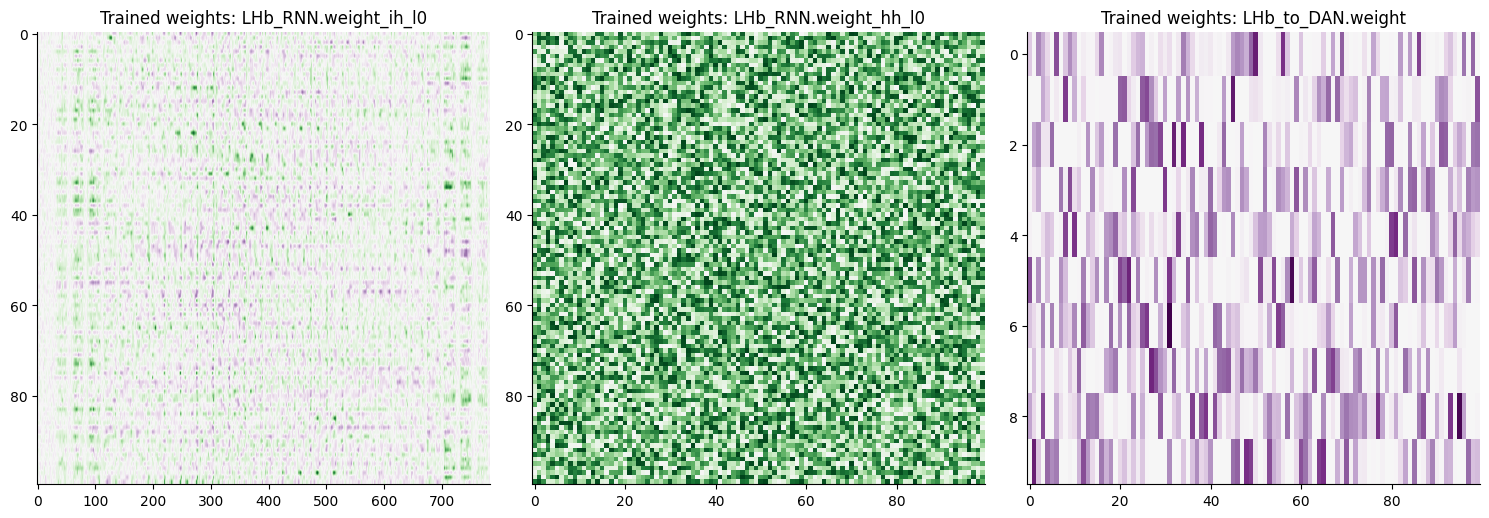

In [12]:
# Save the trianed parameters in paramList
trained_params_corelease = corelease_net.record_params()

# Plot initialized weights
fig, axs = plt.subplots(1,int(len(trained_params_corelease)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in trained_params_corelease.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Trained weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

LHb_RNN.weight_ih_l0 flipped:  29.392% (23043/78400)
LHb_RNN.weight_hh_l0 flipped:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 flipped:  30.000% (30/100)
LHb_RNN.bias_hh_l0 flipped:  39.000% (39/100)
LHb_to_DAN.weight flipped:  0.000% (0/1000)
LHb_to_DAN.bias flipped:  60.000% (6/10)
LHb_RNN.weight_ih_l0 changed:  91.454% (71700/78400)
LHb_RNN.weight_hh_l0 changed:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 changed:  100.000% (100/100)
LHb_RNN.bias_hh_l0 changed:  100.000% (100/100)
LHb_to_DAN.weight changed:  100.000% (1000/1000)
LHb_to_DAN.bias changed:  100.000% (10/10)


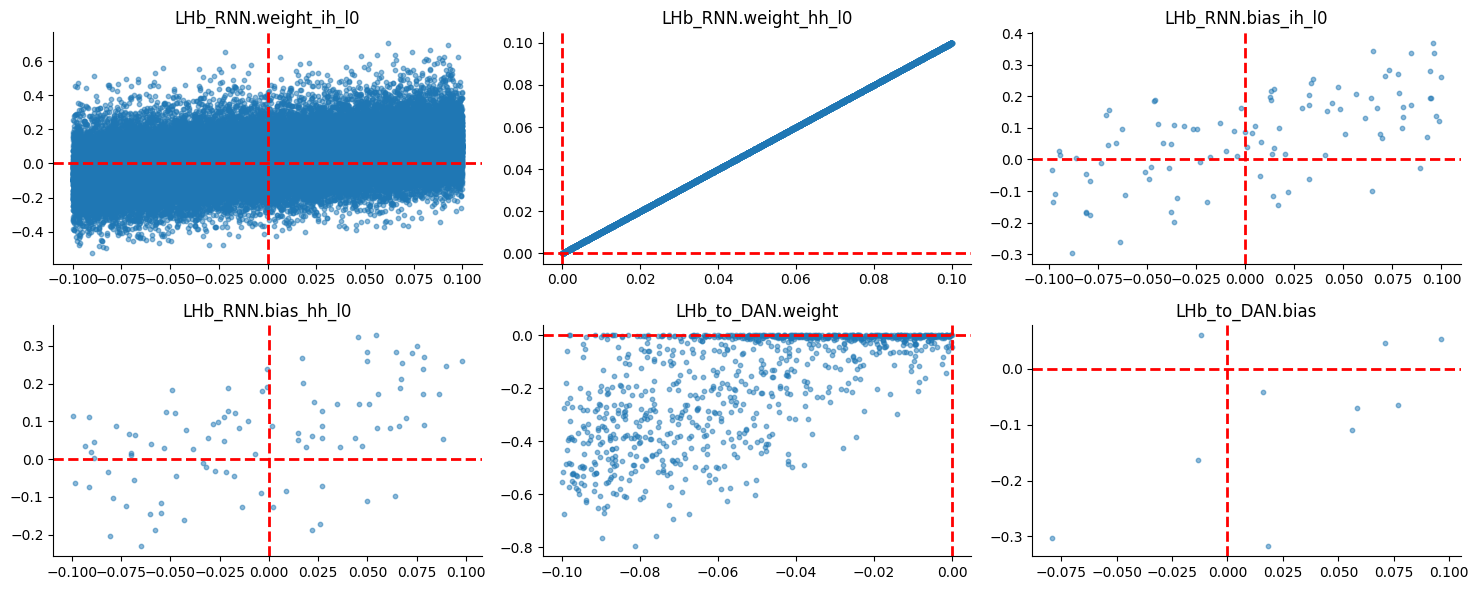

In [13]:
#@title What fraction of parameters flip sign?
for key in initial_params_corelease:
    n_weights=initial_params_corelease[key].numel()
    n_flip = (initial_params_corelease[key].sign()*trained_params_corelease[key].sign()<0).count_nonzero().item()
    print(key + ' flipped: % .3f%% (%d/%d)' %(100*n_flip/n_weights, n_flip, n_weights))

for key in initial_params_corelease:
    n_weights=initial_params_corelease[key].numel()
    n_changed = (initial_params_corelease[key] != trained_params_corelease[key]).count_nonzero().item()
    print(key + ' changed: % .3f%% (%d/%d)' %(100*n_changed/n_weights, n_changed, n_weights))

# Plot initial vs trained values

fig, axs = plt.subplots(2,int(len(trained_params_corelease)/2),figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

ax = 0
for i, ax in enumerate(axs.flatten()):
    key = list(initial_params_corelease)[i]
    ax.scatter(initial_params_corelease[key].numpy(),trained_params_corelease[key].numpy(),s=10,alpha=0.5)
    ax.axhline(y=0, linewidth=2, color = 'r', ls='--')
    ax.axvline(x=0, linewidth=2, color = 'r', ls='--')
    ax.set_title(key)

plt.tight_layout()
plt.show()

## Fixed sign RNN model

In [14]:
fixed_sign_net = EPLHb(input_size,hidden_size,output_size,
                       rnn=True,fixed_sign=True,real_circuit=True)
if torch.cuda.is_available(): fixed_sign_net.cuda()

# Initalize training details
loss_function = nn.CrossEntropyLoss()
# optimizer = gd(fixed_sign_model.parameters(), lr=lr, fixed_sign=True)
fs_optimizer = adam(fixed_sign_net.parameters(), lr=lr, fixed_sign=True)
fs_training_loss = []
fs_test_accuracy = []

LHb_RNN.weight_ih_l0
 Positive: 51.02040767669678%; Negative: 48.97959232330322%; Zero: 0.0%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 43.00000071525574%; Negative: 56.99999928474426%; Zero: 0.0%
LHb_RNN.bias_hh_l0
 Positive: 43.00000071525574%; Negative: 56.99999928474426%; Zero: 0.0%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 100.0%; Zero: 0.0%
LHb_to_DAN.bias
 Positive: 69.9999988079071%; Negative: 30.000001192092896%; Zero: 0.0%


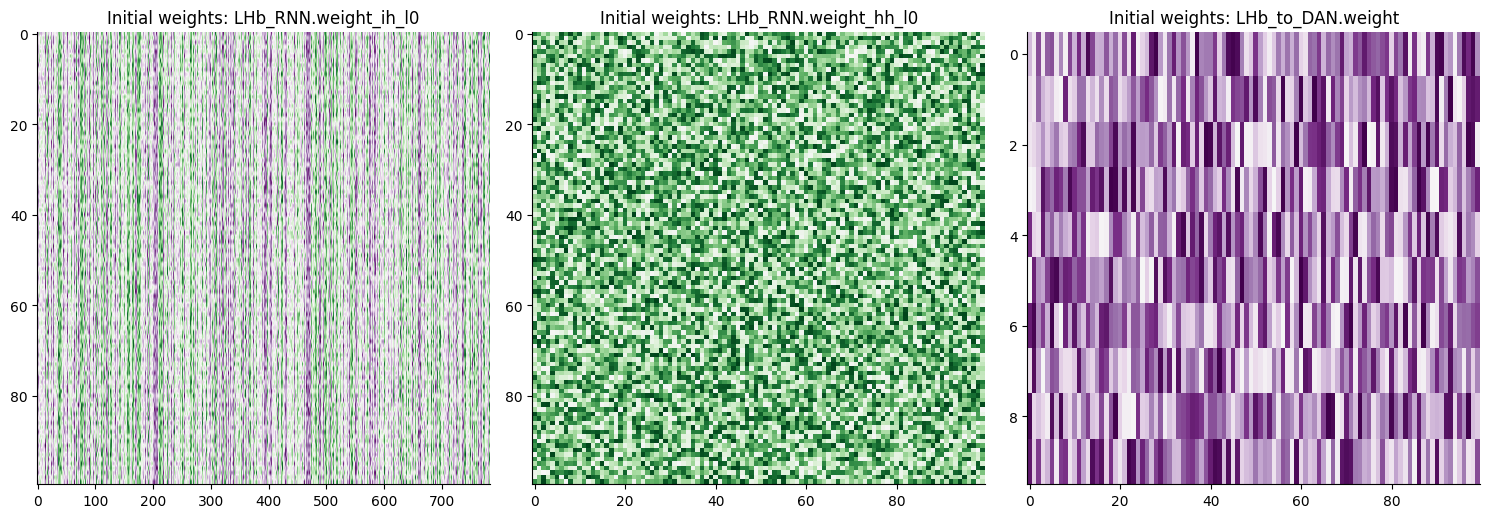

In [15]:
# Save the initial weights
initial_params_fixed = fixed_sign_net.record_params()

# Plot initialized weights
fig, axs = plt.subplots(1,int(len(initial_params_fixed)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in initial_params_fixed.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Initial weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

In [16]:
# Train the network
training_loss, test_accuracy = fixed_sign_net.train_model(num_epochs,train_loader,fs_optimizer,loss='CrossEntropyLoss',
                                           test_loader=test_loader,print_epoch=True)
fs_training_loss.extend(training_loss)
fs_test_accuracy.extend(test_accuracy)

Epoch [1/5], Iteration: 0, Loss: 2, Accuracy: 24.1300
Epoch [1/5], Iteration: 100, Loss: 1, Accuracy: 84.4900
Epoch [1/5], Iteration: 200, Loss: 1, Accuracy: 89.2200
Epoch [1/5], Iteration: 300, Loss: 1, Accuracy: 90.4100
Epoch [1/5], Iteration: 400, Loss: 1, Accuracy: 90.9400
Epoch [1/5], Iteration: 500, Loss: 0, Accuracy: 91.2400
Epoch [2/5], Iteration: 0, Loss: 1, Accuracy: 92.0400
Epoch [2/5], Iteration: 100, Loss: 0, Accuracy: 91.9800
Epoch [2/5], Iteration: 200, Loss: 0, Accuracy: 92.1000
Epoch [2/5], Iteration: 300, Loss: 1, Accuracy: 92.5900
Epoch [2/5], Iteration: 400, Loss: 0, Accuracy: 92.6000
Epoch [2/5], Iteration: 500, Loss: 0, Accuracy: 92.8100
Epoch [3/5], Iteration: 0, Loss: 0, Accuracy: 93.3700
Epoch [3/5], Iteration: 100, Loss: 0, Accuracy: 93.2500
Epoch [3/5], Iteration: 200, Loss: 1, Accuracy: 93.5200
Epoch [3/5], Iteration: 300, Loss: 0, Accuracy: 93.4900
Epoch [3/5], Iteration: 400, Loss: 0, Accuracy: 93.6400
Epoch [3/5], Iteration: 500, Loss: 0, Accuracy: 94.030

KeyboardInterrupt: 

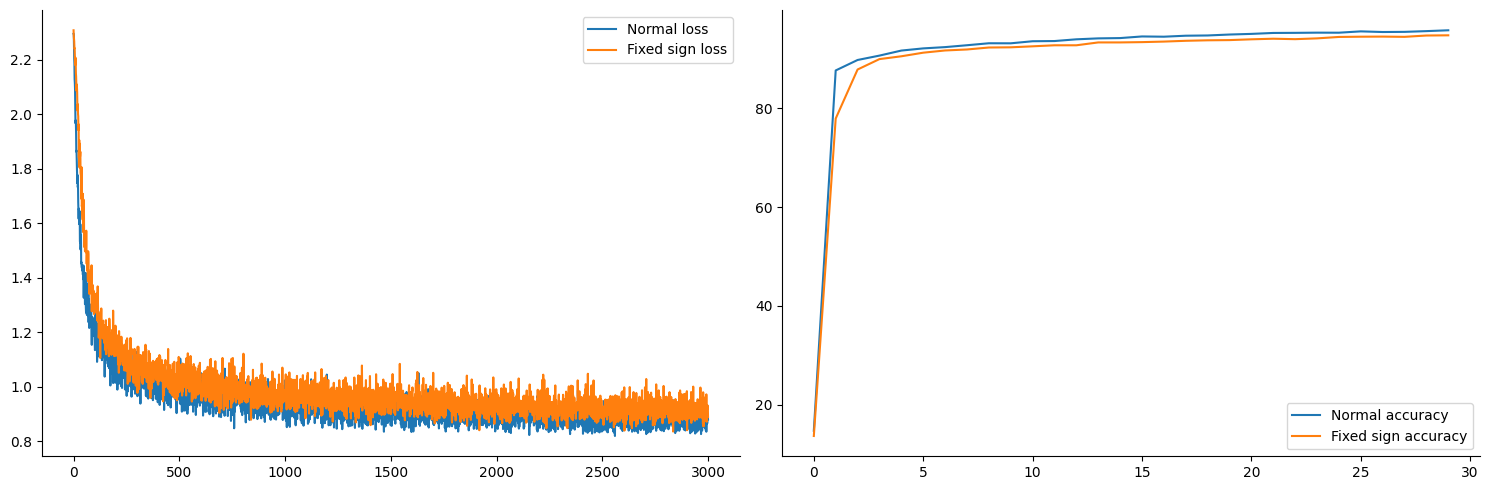

In [ ]:
# Plot training loss history
# plt.plot(cr_training_loss, label='Normal loss')
# plt.plot(fs_training_loss, label='Fixed sign loss')
# plt.legend()

fig, axs = plt.subplots(1,2,figsize=(15, 5))
axs[0].plot(cr_training_loss, label='Normal loss')
axs[0].plot(fs_training_loss, label='Fixed sign loss')
axs[0].legend()
axs[1].plot(cr_test_accuracy, label='Normal accuracy')
axs[1].plot(fs_test_accuracy, label='Fixed sign accuracy')
axs[1].legend()

LHb_RNN.weight_ih_l0
 Positive: 46.94642722606659%; Negative: 38.3507639169693%; Zero: 14.702805876731873%
LHb_RNN.weight_hh_l0
 Positive: 100.0%; Negative: 0.0%; Zero: 0.0%
LHb_RNN.bias_ih_l0
 Positive: 49.000000953674316%; Negative: 46.00000083446503%; Zero: 5.000000074505806%
LHb_RNN.bias_hh_l0
 Positive: 58.99999737739563%; Negative: 37.00000047683716%; Zero: 3.999999910593033%
LHb_to_DAN.weight
 Positive: 0.0%; Negative: 74.29999709129333%; Zero: 25.699999928474426%
LHb_to_DAN.bias
 Positive: 30.000001192092896%; Negative: 69.9999988079071%; Zero: 0.0%


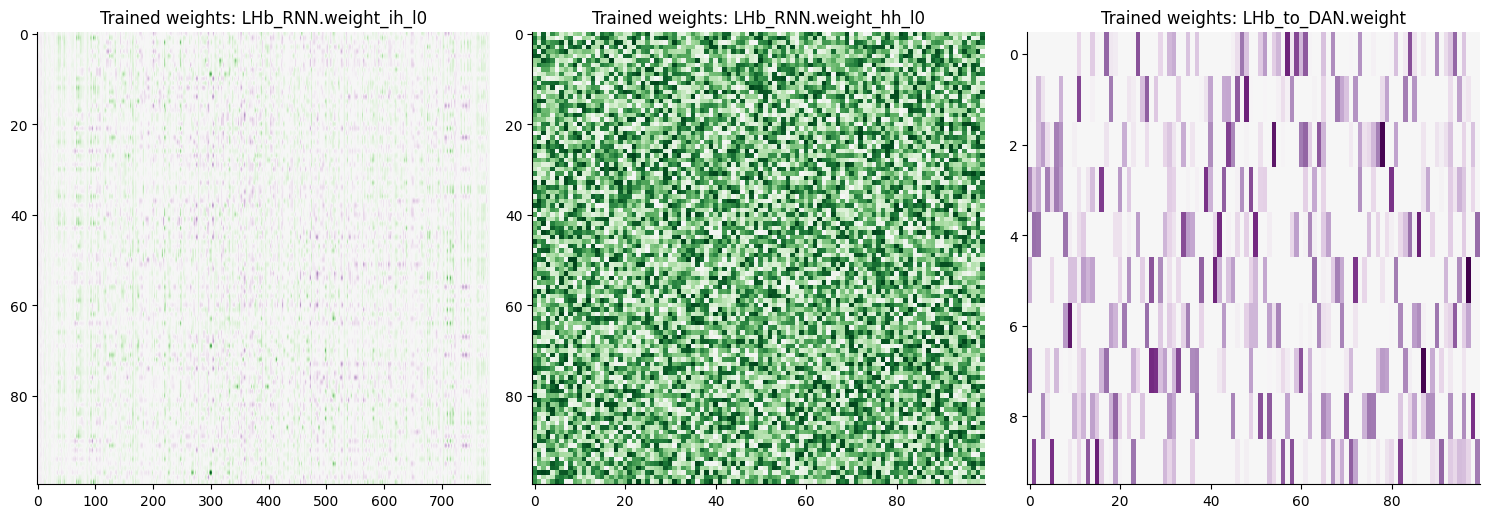

In [ ]:
# Save the trianed parameters in paramList
trained_params_fixed = fixed_sign_net.record_params()
# Plot initialized weights
fig, axs = plt.subplots(1,int(len(initial_params_fixed)/2),figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

ax = 0
for key, value in trained_params_fixed.items():
    if "bias" in key: continue
    im = axs[ax].imshow(value.numpy(), cmap='PRGn', aspect=value.shape[1]/value.shape[0],
                        vmax=abs(value.numpy()).max(), vmin=-abs(value.numpy()).max())
    axs[ax].set_title('Trained weights: ' + key)
    # plt.colorbar(im)
    ax += 1

plt.tight_layout()
plt.show()

LHb_RNN.weight_ih_l0 flipped:  0.000% (0/78400)
LHb_RNN.weight_hh_l0 flipped:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 flipped:  0.000% (0/100)
LHb_RNN.bias_hh_l0 flipped:  0.000% (0/100)
LHb_to_DAN.weight flipped:  0.000% (0/1000)
LHb_to_DAN.bias flipped:  0.000% (0/10)
LHb_RNN.weight_ih_l0 changed:  91.454% (71700/78400)
LHb_RNN.weight_hh_l0 changed:  0.000% (0/10000)
LHb_RNN.bias_ih_l0 changed:  100.000% (100/100)
LHb_RNN.bias_hh_l0 changed:  100.000% (100/100)
LHb_to_DAN.weight changed:  100.000% (1000/1000)
LHb_to_DAN.bias changed:  100.000% (10/10)


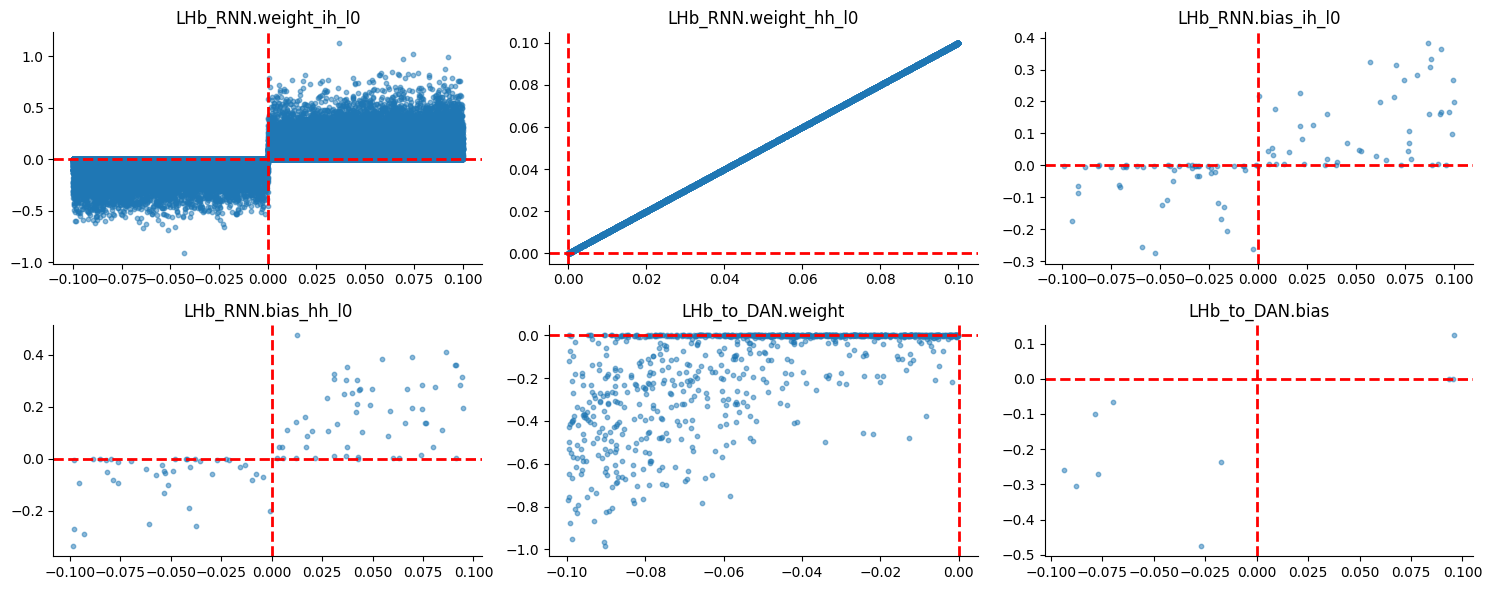

In [ ]:
#@title What fraction of parameters flip sign?
for key in initial_params_fixed:
    n_weights=initial_params_fixed[key].numel()
    n_flip = (initial_params_fixed[key].sign()*trained_params_fixed[key].sign()<0).count_nonzero().item()
    print(key + ' flipped: % .3f%% (%d/%d)' %(100*n_flip/n_weights, n_flip, n_weights))

for key in initial_params_fixed:
    n_weights=initial_params_fixed[key].numel()
    n_changed = (initial_params_fixed[key] != trained_params_fixed[key]).count_nonzero().item()
    print(key + ' changed: % .3f%% (%d/%d)' %(100*n_changed/n_weights, n_changed, n_weights))

# Plot initial vs trained values

fig, axs = plt.subplots(2,int(len(trained_params_fixed)/2),figsize=(15, 6))
plt.subplots_adjust(hspace=0.5)

ax = 0
for i, ax in enumerate(axs.flatten()):
    key = list(initial_params_fixed)[i]
    ax.scatter(initial_params_fixed[key].numpy(),trained_params_fixed[key].numpy(),s=10,alpha=0.5)
    ax.axhline(y=0, linewidth=2, color = 'r', ls='--')
    ax.axvline(x=0, linewidth=2, color = 'r', ls='--')
    ax.set_title(key)

plt.tight_layout()
plt.show()

## Weight change analysis

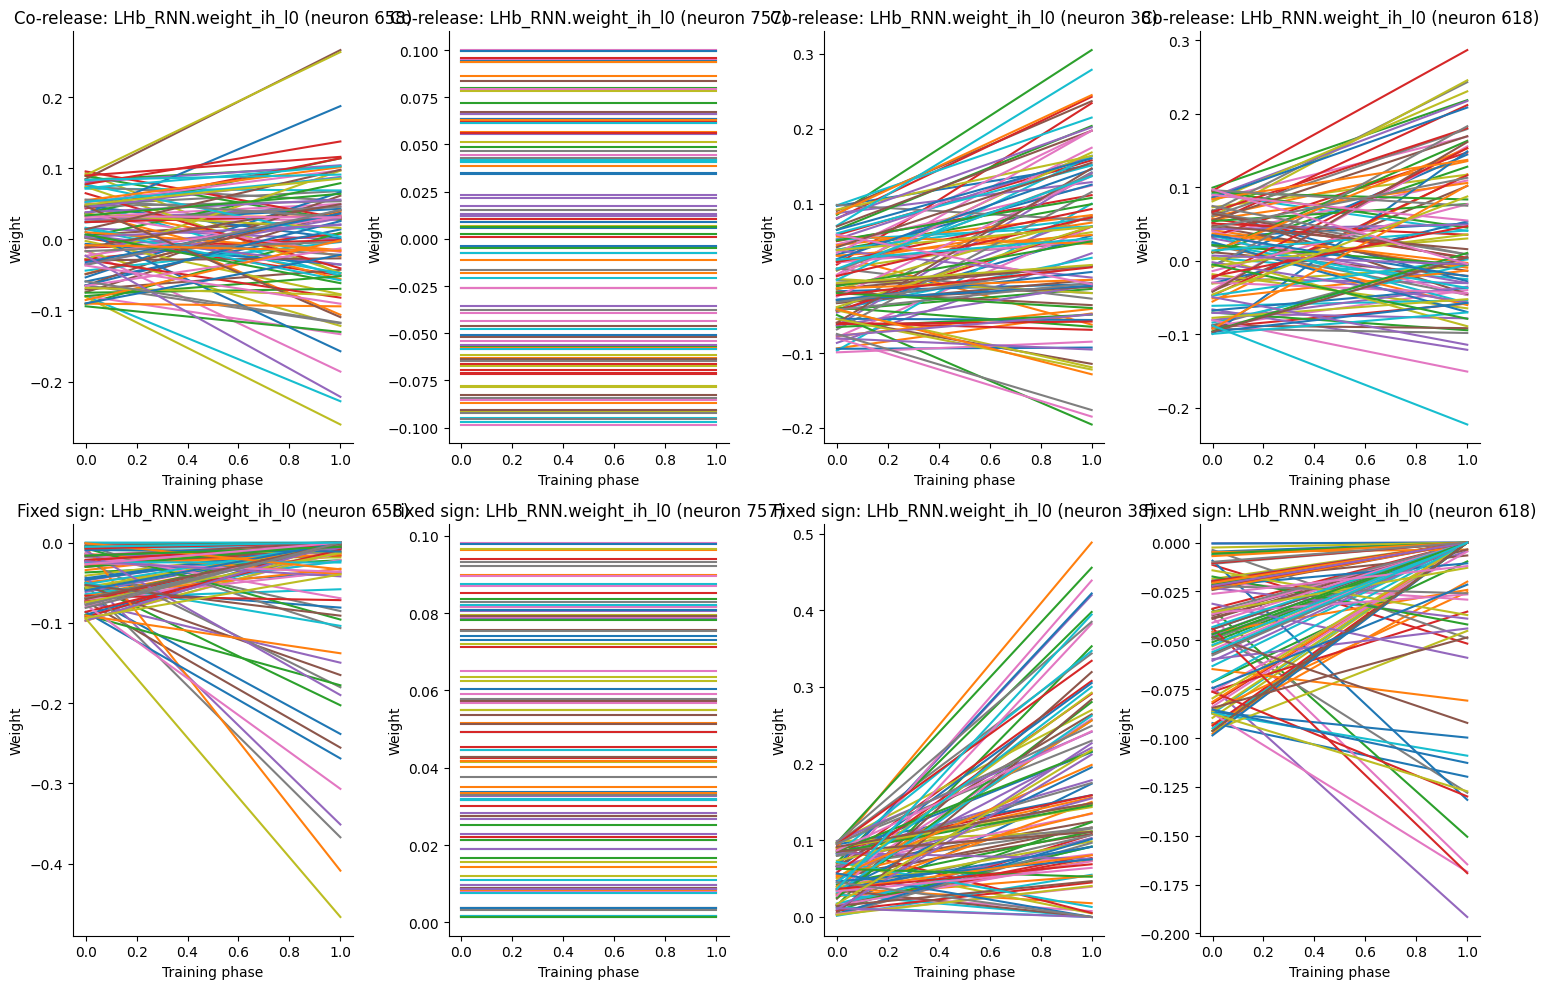

In [ ]:
# Plot flipped EP neuron weight changes
n_row = 2
n_col = 4

fig, axs = plt.subplots(n_row,n_col,figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

key = list(initial_params_corelease)[0]
picked_neurons = torch.randint(1,input_size,(n_col,))

for i, neuron in enumerate(picked_neurons):
    weight_history_corelease = [initial_params_corelease[key][:,neuron].flatten(),
                                trained_params_corelease[key][:,neuron].flatten()]

    weight_history_fixed = [initial_params_fixed[key][:,neuron].flatten(),
                            trained_params_fixed[key][:,neuron].flatten()]

    axs.flatten()[i].plot(weight_history_corelease)
    axs.flatten()[i].set_xlabel('Training phase')
    axs.flatten()[i].set_ylabel('Weight')
    axs.flatten()[i].set_title('Co-release: %s (neuron %d)' %(key, neuron))
    axs.flatten()[i+n_col].plot(weight_history_fixed)
    axs.flatten()[i+n_col].set_xlabel('Training phase')
    axs.flatten()[i+n_col].set_ylabel('Weight')
    axs.flatten()[i+n_col].set_title('Fixed sign: %s (neuron %d)' %(key, neuron))

plt.tight_layout()
plt.show()

## Train multiple networks per condition

In [ ]:
EP_size = 784 # img_size = (28,28) ---> 28*28=784 in total
LHb_size = 100 # number of nodes at hidden layer
DAN_size = 10 # number of output classes discrete range [0,9]
num_epochs = 10 # 20 # number of times which the entire dataset is passed throughout the model
lr = 1e-3 # size of step

prob_EP_to_LHb = 1
prob_LHb_to_LHb = 1
prob_LHb_to_DAN = 1

n_networks = 20 # number of networks to train

### Train multiple co-release models

In [ ]:
cr_training_loss_summary = []
cr_test_accuracy_summary = []

for i in range(1,n_networks+1):
    # Initialize a network
    net = EPLHb(EP_size,LHb_size,DAN_size,
                rnn=True,fixed_sign=False,real_circuit=True,
                prob_EP_to_LHb=prob_EP_to_LHb,prob_LHb_to_LHb=prob_LHb_to_LHb,prob_LHb_to_DAN=prob_LHb_to_DAN)
    initial_params = net.record_params(calc_sign=False)
    net_training_loss = []
    net_test_accuracy = []
    if torch.cuda.is_available(): net.cuda()

    # Train on original data
    optimizer = adam(net.parameters(), lr=lr, fixed_sign=False)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    training_loss, test_accuracy = net.train_model(num_epochs,train_loader,optimizer,
                                    test_loader=test_loader,print_epoch=False,loss='CrossEntropyLoss')
    net_training_loss.extend(training_loss)
    net_test_accuracy.extend(test_accuracy)

    # Train on flipped data
    # optimizer = adam(net.parameters(), lr=lr, fixed_sign=False)
    # training_loss = net.train_model(num_epochs,flip_loader,optimizer,print_epoch=False)
    # net_training_loss.extend(training_loss)

    cr_training_loss_summary.append(net_training_loss)
    cr_test_accuracy_summary.append(net_test_accuracy)
    print('Finished training co-release network %d/%d' %(i,n_networks))

# Convert list to numpy array
cr_training_loss_summary = np.array(cr_training_loss_summary)
cr_test_accuracy_summary = np.array(cr_test_accuracy_summary)

# # Plot training loss for all network separately
# fig, axs = plt.subplots(n_networks,1,figsize=(15,3*n_networks))
# for i, ax in enumerate(axs.flatten()):
#     ax.plot(cr_training_loss_summary[i])
#     ax.set_title('Corelease # %d' %(i+1))

Finished training co-release network 1/20


KeyboardInterrupt: 

### Train multiple fixed sign models

In [ ]:
fs_training_loss_summary = []
fs_test_accuracy_summary = []

for i in range(1,n_networks+1):
    # Initialize a network
    net = EPLHb(EP_size,LHb_size,DAN_size,
                rnn=True,fixed_sign=True,real_circuit=True,
                prob_EP_to_LHb=prob_EP_to_LHb,prob_LHb_to_LHb=prob_LHb_to_LHb,prob_LHb_to_DAN=prob_LHb_to_DAN)
    initial_params = net.record_params(calc_sign=False)
    net_training_loss = []
    net_test_accuracy = []
    if torch.cuda.is_available(): net.cuda()

    # Train on original data
    optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    training_loss, test_accuracy = net.train_model(num_epochs,train_loader,optimizer,
                                    test_loader=test_loader,print_epoch=False,loss='CrossEntropyLoss')
    net_training_loss.extend(training_loss)
    net_test_accuracy.extend(test_accuracy)

    # Train on flipped data
    # optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # training_loss = net.train_model(num_epochs,flip_loader,optimizer,print_epoch=False)
    # net_training_loss.extend(training_loss)

    fs_training_loss_summary.append(net_training_loss)
    fs_test_accuracy_summary.append(net_test_accuracy)
    print('Finished training fixed sign network %d/%d' %(i,n_networks))

# Convert list to numpy array
fs_training_loss_summary = np.array(fs_training_loss_summary)
fs_test_accuracy_summary = np.array(fs_test_accuracy_summary)


# # Plot training loss for all network separately
# fig, axs = plt.subplots(n_networks,1,figsize=(15,3*n_networks))
# for i, ax in enumerate(axs.flatten()):
#     ax.plot(fs_training_loss_summary[i])
#     ax.set_title('Fixed # %d' %(i+1))

### Train fixed sign without negative output

In [ ]:
fs_posneg_training_loss_summary = []
fs_posneg_test_accuracy_summary = []

for i in range(1,n_networks+1):
    # Initialize a network
    net = EPLHb(EP_size,LHb_size,DAN_size,
                rnn=True, fixed_sign=True, real_circuit=False,
                prob_EP_to_LHb=prob_EP_to_LHb,prob_LHb_to_LHb=prob_LHb_to_LHb,prob_LHb_to_DAN=prob_LHb_to_DAN)
    initial_params = net.record_params(calc_sign=False)
    net_training_loss = []
    net_test_accuracy = []
    if torch.cuda.is_available(): net.cuda()

    # Train on original data
    optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.95)
    training_loss, test_accuracy = net.train_model(num_epochs,train_loader,optimizer,
                                    test_loader=test_loader,print_epoch=False,loss='CrossEntropyLoss')
    net_training_loss.extend(training_loss)
    net_test_accuracy.extend(test_accuracy)

    # Train on flipped data
    # optimizer = adam(net.parameters(), lr=lr, fixed_sign=True)
    # training_loss = net.train_model(num_epochs,flip_loader,optimizer,print_epoch=False)
    # net_training_loss.extend(training_loss)

    fs_posneg_training_loss_summary.append(net_training_loss)
    fs_posneg_test_accuracy_summary.append(net_test_accuracy)
    print('Finished training fixed sign network %d/%d' %(i,n_networks))

# Convert list to numpy array
fs_posneg_training_loss_summary = np.array(fs_posneg_training_loss_summary)
fs_posneg_test_accuracy_summary = np.array(fs_posneg_test_accuracy_summary) 

# # Plot training loss for all network separately
# fig, axs = plt.subplots(n_networks,1,figsize=(15,3*n_networks))
# for i, ax in enumerate(axs.flatten()):
#     ax.plot(fs_training_loss_summary[i])
#     ax.set_title('Fixed # %d' %(i+1))

### Plot summary

In [ ]:
# Loss
mean_cr_loss = np.mean(cr_training_loss_summary,axis=0)
sem_cr_loss = stats.sem(cr_training_loss_summary)
mean_fs_loss = np.mean(fs_training_loss_summary,axis=0)
sem_fs_loss = stats.sem(fs_training_loss_summary)
mean_fs_posneg_loss = np.mean(fs_posneg_training_loss_summary,axis=0)
sem_fs_posneg_loss = stats.sem(fs_posneg_training_loss_summary)

# Test accuracy
mean_cr_accuracy = np.mean(cr_test_accuracy_summary,axis=0)
sem_cr_accuracy = stats.sem(cr_test_accuracy_summary)
mean_fs_accuracy = np.mean(fs_test_accuracy_summary,axis=0)
sem_fs_accuracy = stats.sem(fs_test_accuracy_summary)
mean_fs_posneg_accuracy = np.mean(fs_posneg_test_accuracy_summary,axis=0)
sem_fs_posneg_accuracy = stats.sem(fs_posneg_test_accuracy_summary)

# Plot
fig, axs = plt.subplots(1,2,figsize=(15, 5))

# Plot loss
x = np.linspace(1,mean_cr_loss.shape[0],num=mean_cr_loss.shape[0],dtype='int32')
axs[0].plot(mean_cr_loss, label='Co-release')
axs[0].fill_between(x,mean_cr_loss+sem_cr_loss,mean_cr_loss-sem_cr_loss,alpha=0.2)
axs[0].plot(mean_fs_loss, label='Fixed sign')
axs[0].fill_between(x,mean_fs_loss+sem_fs_loss,mean_fs_loss-sem_fs_loss,alpha=0.2)
axs[0].plot(mean_fs_posneg_loss, label='Fixed sign without neg output')
axs[0].fill_between(x,mean_fs_posneg_loss+sem_fs_posneg_loss,mean_fs_posneg_loss-sem_fs_posneg_loss,alpha=0.2)

axs[0].set_xlabel('Trianing epochs')
axs[0].set_ylabel('Training loss')
axs[0].legend()

# Plot accuracy
x = np.linspace(1,mean_cr_accuracy.shape[0],num=mean_cr_accuracy.shape[0],dtype='int32')
axs[0].plot(mean_cr_accuracy, label='Co-release')
axs[0].fill_between(x,mean_cr_accuracy+sem_cr_accuracy,mean_cr_accuracy-sem_cr_accuracy,alpha=0.2)
axs[0].plot(mean_fs_accuracy, label='Fixed sign')
axs[0].fill_between(x,mean_fs_accuracy+sem_fs_accuracy,mean_fs_accuracy-sem_fs_accuracy,alpha=0.2)
axs[0].plot(mean_fs_posneg_accuracy, label='Fixed sign without neg output')
axs[0].fill_between(x,mean_fs_posneg_accuracy+sem_fs_posneg_accuracy,mean_fs_posneg_accuracy-sem_fs_posneg_accuracy,alpha=0.2)

axs[0].set_xlabel('Trianing epochs')
axs[0].set_ylabel('Training loss')
axs[0].legend()